<a href="https://colab.research.google.com/github/mohantvss/CI-CD/blob/main/Domain_Telecom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [450]:
tdf = pd.read_csv('/content/telecom_churn_data.csv')
tdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [451]:
tdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

### Filter high-value customers

In [452]:
churn_data = tdf.copy()

In [453]:
col_rech = [col for col in churn_data.columns if 'rech' in col]
col_rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [454]:
### Finding total amount data usage

churn_data['total_data_rech_amt_6'] = churn_data['av_rech_amt_data_6'] * churn_data['total_rech_data_6']
churn_data['total_data_rech_amt_7'] = churn_data['av_rech_amt_data_7'] * churn_data['total_rech_data_7']
churn_data['total_data_rech_amt_8'] = churn_data['av_rech_amt_data_8'] * churn_data['total_rech_data_8']
churn_data['total_data_rech_amt_9'] = churn_data['av_rech_amt_data_9'] * churn_data['total_rech_data_9']

In [455]:
# Drop the columns already accounted for
churn_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [456]:
## Finding avearge amount for good phrase i.e. 70
good_phase_ave_amount_rech = (churn_data['total_data_rech_amt_6'].fillna(0)+ churn_data['total_data_rech_amt_7'].fillna(0)+
                              churn_data['total_rech_amt_6'].fillna(0)+ churn_data['total_rech_amt_7'].fillna(0) )/2

good_phase_ave_amount_rech_70 = np.percentile(good_phase_ave_amount_rech, 70)

good_phase_ave_amount_rech_70

478.0

In [457]:
churn_data = churn_data[good_phase_ave_amount_rech >= good_phase_ave_amount_rech_70]

churn_data.shape

(30001, 222)

### Taggging the Data

In [458]:
## Collect all with 9

mnth9_columns = [col for col in tdf.columns if '9' in col]

# Seperating the ic columns
mnth9_ic_columns = [col for col in mnth9_columns if 'ic' in col and 'mou' in col]

# Seperating oc columns
mnth9_oc_columns = [col for col in mnth9_columns if 'oc' in col and 'mou' in col]

# Seperating vol columns
mnth9_vol_columns = [col for col in mnth9_columns if 'vol' in col and 'mb' in col]

In [459]:
# Sum of all the ic columns
churn_data['ic_sum'] = tdf[mnth9_ic_columns].sum(axis = 1)

# Sum of all the oc columns
churn_data['oc_sum'] = tdf[mnth9_oc_columns].sum(axis = 1)

# Sum of all the vol columns
churn_data['vol_sum'] = tdf[mnth9_vol_columns].sum(axis = 1)

In [460]:
churn_tag_columns = ['vol_sum', 'oc_sum', 'ic_sum']

# Create churn as the sum of newly aggregrated columns, as that will be 0 if all of the columns have 0 values
churn_data['churn'] = churn_data[churn_tag_columns].sum(axis = 1)

churn_data.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,oc_sum,vol_sum,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,101.20,3.58,252.0,252.0,252.0,NaN,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,18.74,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,122.16,0.00,NaN,354.0,207.0,NaN,104.72,164.17,0.00,268.89
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,NaN,NaN,NaN,NaN,757.80,554.79,0.00,1312.59
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,0.00,0.00,NaN,712.0,540.0,252.0,382.42,450.31,328.67,1161.40


In [461]:
## Tag the churned customers (churn=1, else 0)

churn_data['churn'] = churn_data['churn'].apply(lambda x: 0 if x >0  else 1)

churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,oc_sum,vol_sum,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,101.20,3.58,252.0,252.0,252.0,NaN,0.00,0.00,0.00,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,18.74,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,122.16,0.00,NaN,354.0,207.0,NaN,104.72,164.17,0.00,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,NaN,NaN,NaN,NaN,757.80,554.79,0.00,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,0.00,0.00,NaN,712.0,540.0,252.0,382.42,450.31,328.67,0


In [462]:
churn_data['churn'].value_counts(normalize=True)

,proportion
churn,
0,0.942369
1,0.057631


In [463]:
## Droping columns 9th month mnth9_columns

churn_data.drop( [ col for col in mnth9_columns + churn_tag_columns if col not in ['total_rech_data_9', 'av_rech_amt_data_9'] ],
                axis=1,
                inplace=True)
churn_data.shape

(30001, 171)

### Data Analysis and cleaning

In [464]:
churn_data.shape

(30001, 171)

In [465]:
# Check columns for only 1 unique value
drop_col_sngl_val = []

for col in churn_data.columns:
    if churn_data[col].nunique() == 1:
        drop_col_sngl_val.append(col)

drop_col_sngl_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [466]:
## Dropping columns those have unique values
churn_data.drop(drop_col_sngl_val, axis=1, inplace=True)

In [467]:
### Checking for null values in the data. Not remvoing these columns
tdf_check = (churn_data.isnull().sum()/len(tdf)*100).sort_values(ascending=False)
len(tdf_check[tdf_check >70])

0

In [468]:
tdf_check[tdf_check >70]

,0


In [469]:
churn_data.shape

(30001, 158)

### EDA

In [470]:
object_col_data = churn_data.select_dtypes(include=['object'])
print(object_col_data.iloc[0])


date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
Name: 0, dtype: object


In [471]:
# convert to datetime
for col in object_col_data:
    churn_data[col] = pd.to_datetime(churn_data[col])

churn_data.shape

(30001, 158)

In [472]:
# lets check the correlation amongst the features, drop the highly correlated ones
cor = churn_data.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

,,0
monthly_3g_6,vol_3g_mb_6,0.601308
total_ic_mou_7,loc_ic_t2t_mou_7,0.601684
sachet_2g_6,count_rech_2g_8,0.603205
total_rech_amt_8,arpu_6,0.603673
max_rech_data_8,max_rech_amt_8,0.603802
...,...,...
isd_og_mou_8,isd_og_mou_6,0.950194
total_rech_amt_8,arpu_8,0.955351
sachet_2g_6,count_rech_2g_6,0.984706
sachet_2g_7,count_rech_2g_7,0.986165


In [473]:
# we will drop the columns with high correlation (+/- 60%)

drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8', 'std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8', 'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8', 'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8', 'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

churn_data.drop(drop_col_list, axis=1, inplace=True)
churn_data.shape

(30001, 116)

In [474]:
cols_to_drop = [col for col in churn_data.columns if '_9' in col]
print(cols_to_drop)
churn_data.drop(cols_to_drop, axis=1, inplace=True)

['total_data_rech_amt_9']


In [475]:
churn_data.shape

(30001, 115)

In [476]:
churn_col = (churn_data.isnull().sum()/len(tdf)*100).sort_values(ascending=False)

col1 = churn_col[churn_col >0]

In [477]:
for col in churn_data.columns:
    churn_data = churn_data[~churn_data[col].isna()]

# Re-check missing values
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

,0
mobile_number,0.0
arpu_2g_7,0.0
arpu_3g_8,0.0
arpu_3g_7,0.0
arpu_3g_6,0.0
...,...
og_others_6,0.0
spl_og_mou_8,0.0
spl_og_mou_7,0.0
spl_og_mou_6,0.0


In [478]:
# creating a new variable 'tenure'
churn_data['tenure'] = (churn_data['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
churn_data.drop('aon',axis=1, inplace=True)

In [479]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_data['tenure_range'] = pd.cut(churn_data['tenure'], tn_range, labels=tn_label)
churn_data['tenure_range'].head()

,tenure_range
33,2-5 Yrs
53,1-2 Yrs
56,1-2 Yrs
57,NaN
61,2-5 Yrs


In [480]:
churn_data.shape

(11647, 116)

In [481]:
# The date columns don't add any value excpet for marking the last day of the period so we will drop them
date_col = [col for col in churn_data.columns if 'date' in col]
churn_data.drop(date_col, axis=1, inplace=True)
[col for col in churn_data.columns if 'date' in col]

[]

In [482]:
# Drop the column 'mobile_number' as it does not add any information
churn_data.drop('mobile_number', axis=1, inplace=True)
churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn,tenure,tenure_range
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,358.10,2706.83,1714.67,0.0,5285.0,20424.0,455.0,0,44.0,2-5 Yrs
53,978.077,1141.296,706.020,135.14,119.59,102.69,479.31,543.18,261.34,0.0,...,0.00,0.00,0.00,0.0,344.0,575.0,23.0,0,23.0,1-2 Yrs
56,452.624,320.548,368.807,34.46,43.11,50.61,131.59,90.61,84.31,0.0,...,277.97,535.63,1459.45,0.0,616.0,3600.0,6400.0,0,24.0,1-2 Yrs
57,1201.298,687.704,602.052,61.23,7.39,62.89,165.41,211.31,168.01,0.0,...,1799.09,3649.39,1892.32,0.0,5244.0,655.0,455.0,0,104.0,NaN
61,565.516,390.307,430.911,178.41,226.81,170.11,186.68,45.08,145.08,0.0,...,0.00,0.00,0.00,0.0,358.0,154.0,154.0,0,38.0,2-5 Yrs


In [483]:
churn_data.shape

(11647, 112)

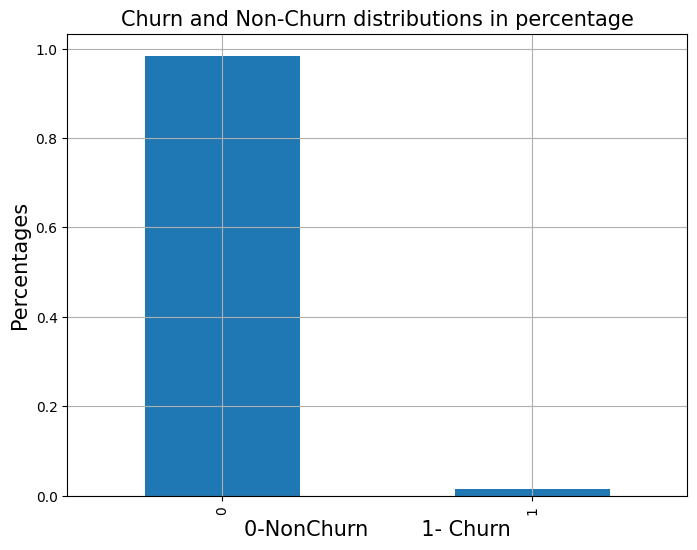

In [484]:
# plot to Check percetanges of churn and non churn data
plt.figure(figsize=(8,6))
churn_data["churn"].value_counts(normalize=True).plot.bar()
# plt.tick_params(size=5,labelsize = 15)
plt.title("Churn and Non-Churn distributions in percentage",fontsize=15)
plt.ylabel("Percentages",fontsize=15)
plt.xlabel("0-NonChurn        1- Churn",fontsize=15)
plt.grid(0.3)
plt.show()

In [485]:
#check columns associated with month 6, From month 6 we can figure out how the columns and data are in other months
cols_6 = [col for col in churn_data.columns if "_6" in col]
cols_6

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'vol_2g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'total_data_rech_amt_6']

In [486]:
#compare average revenue and calculate the difference
churn_data['arpu_diff'] = churn_data.arpu_8 - ((churn_data.arpu_6 + churn_data.arpu_7)/2)

In [487]:
# Check various columns related to Minutes of Usage and calculate difference
churn_data['onnet_mou_diff'] = churn_data.onnet_mou_8 - ((churn_data.onnet_mou_6 + churn_data.onnet_mou_7)/2)
churn_data['offnet_mou_diff'] = churn_data.offnet_mou_8 - ((churn_data.offnet_mou_6 + churn_data.offnet_mou_7)/2)
churn_data['roam_ic_mou_diff'] = churn_data.roam_ic_mou_8 - ((churn_data.roam_ic_mou_6 + churn_data.roam_ic_mou_7)/2)
churn_data['roam_og_mou_diff'] = churn_data.roam_og_mou_8 - ((churn_data.roam_og_mou_6 + churn_data.roam_og_mou_7)/2)
churn_data['loc_og_mou_diff'] = churn_data.loc_og_mou_8 - ((churn_data.loc_og_mou_6 + churn_data.loc_og_mou_7)/2)
churn_data['std_og_mou_diff'] = churn_data.std_og_mou_8 - ((churn_data.std_og_mou_6 + churn_data.std_og_mou_7)/2)
churn_data['isd_og_mou_diff'] = churn_data.isd_og_mou_8 - ((churn_data.isd_og_mou_6 + churn_data.isd_og_mou_7)/2)
churn_data['spl_og_mou_diff'] = churn_data.spl_og_mou_8 - ((churn_data.spl_og_mou_6 + churn_data.spl_og_mou_7)/2)
# churn_data['total_og_mou_diff'] = churn_data.total_og_mou_8 - ((churn_data.total_og_mou_6 + churn_data.total_og_mou_7)/2)
churn_data['loc_ic_mou_diff'] = churn_data.loc_ic_mou_8 - ((churn_data.loc_ic_mou_6 + churn_data.loc_ic_mou_7)/2)
churn_data['std_ic_mou_diff'] = churn_data.std_ic_mou_8 - ((churn_data.std_ic_mou_6 + churn_data.std_ic_mou_7)/2)
churn_data['isd_ic_mou_diff'] = churn_data.isd_ic_mou_8 - ((churn_data.isd_ic_mou_6 + churn_data.isd_ic_mou_7)/2)
churn_data['spl_ic_mou_diff'] = churn_data.spl_ic_mou_8 - ((churn_data.spl_ic_mou_6 + churn_data.spl_ic_mou_7)/2)
# churn_data['total_ic_mou_diff'] = churn_data.total_ic_mou_8 - ((churn_data.total_ic_mou_6 + churn_data.total_ic_mou_7)/2)

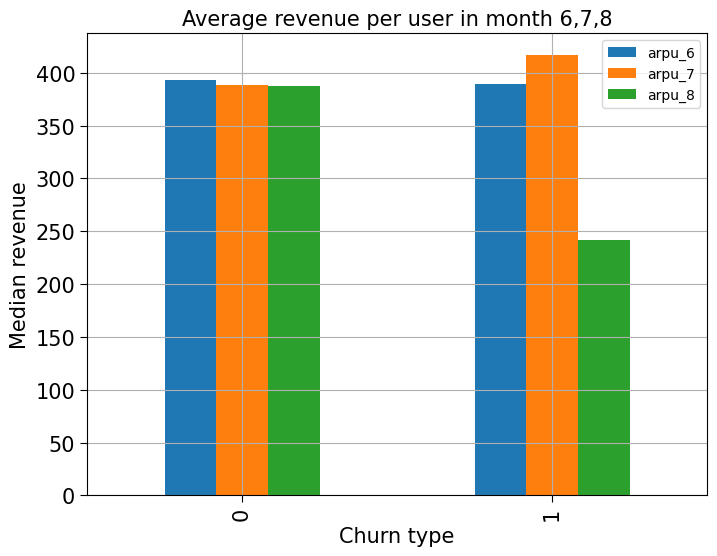

In [488]:
# Plot to visualize average revenue per user (ARPU)
churn_data.groupby("churn")[["arpu_6", "arpu_7", "arpu_8"]].median().plot.bar(figsize=[8,6])

# Set plot title and labels
plt.title("Average revenue per user in month 6,7,8", fontsize=15)
plt.tick_params(size=5, labelsize=15)
plt.ylabel("Median revenue", fontsize=15)
plt.xlabel("Churn type", fontsize=15)

# Customize grid
plt.grid(0.3)

# Show the plot
plt.show()

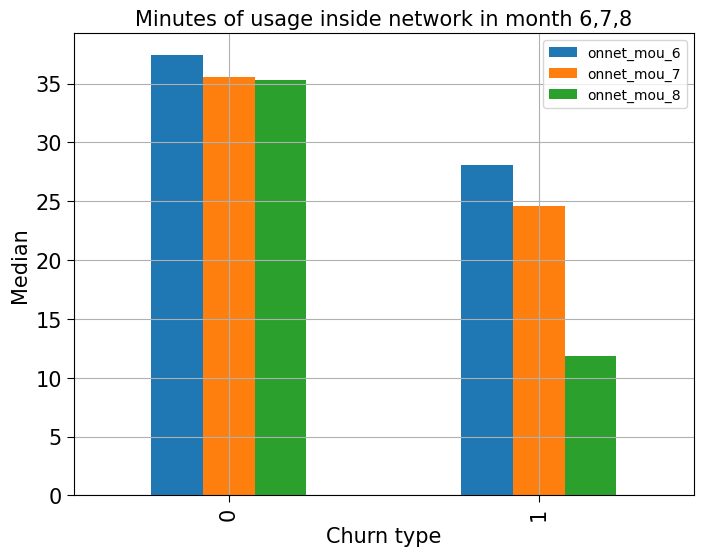

In [653]:
# Plot to visualize onnet_mou
churn_data.groupby("churn")[["onnet_mou_6", "onnet_mou_7", "onnet_mou_8"]].median().plot.bar(figsize=[8,6])

# Set plot labels and title
plt.tick_params(size=5, labelsize=15)
plt.title("Minutes of usage inside network in month 6,7,8", fontsize=15)
plt.ylabel("Median", fontsize=15)
plt.xlabel("Churn type", fontsize=15)

# Customize grid
plt.grid(0.3)

# Show the plot
plt.show()


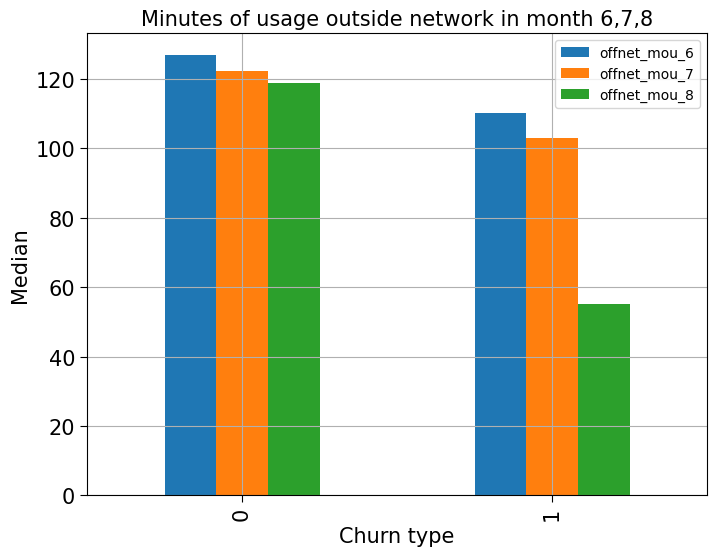

In [654]:
# Plot to visualize offnet_mou
churn_data.groupby("churn")[["offnet_mou_6", "offnet_mou_7", "offnet_mou_8"]].median().plot.bar(figsize=[8,6])

# Set plot labels and title
plt.tick_params(size=5, labelsize=15)
plt.title("Minutes of usage outside network in month 6,7,8", fontsize=15)
plt.ylabel("Median", fontsize=15)
plt.xlabel("Churn type", fontsize=15)

# Customize grid
plt.grid(0.3)

# Show the plot
plt.show()

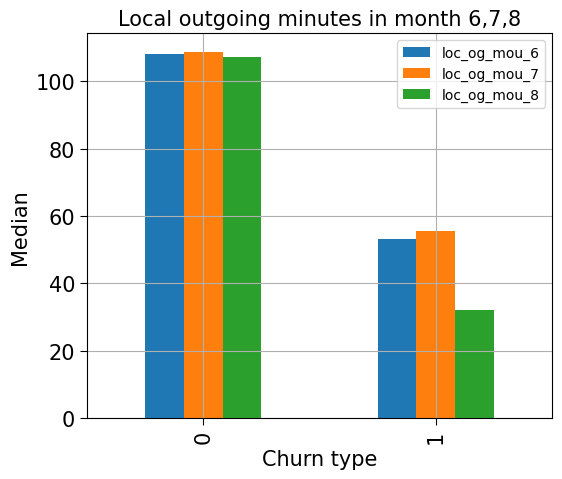

In [655]:
# Plot to visualize loc_og_mou
churn_data.groupby("churn")[["loc_og_mou_6", "loc_og_mou_7", "loc_og_mou_8"]].median().plot.bar(figsize=[6,5])

# Set plot labels and title
plt.tick_params(size=5, labelsize=15)
plt.title("Local outgoing minutes in month 6,7,8", fontsize=15)
plt.ylabel("Median", fontsize=15)
plt.xlabel("Churn type", fontsize=15)

# Customize grid
plt.grid(0.3)

# Show the plot
plt.show()

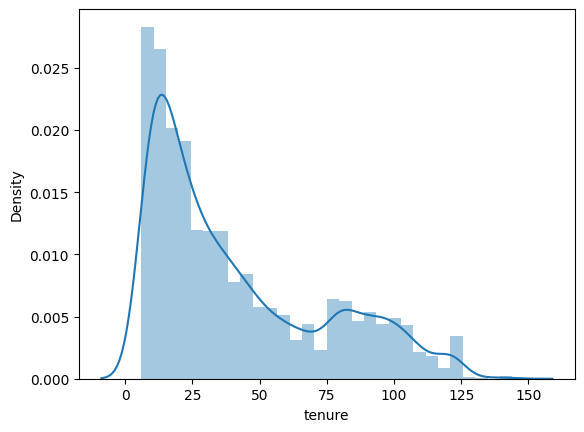

In [489]:
# Checking the distribution of he tenure variable

sns.distplot(churn_data['tenure'],bins=30)
plt.show()

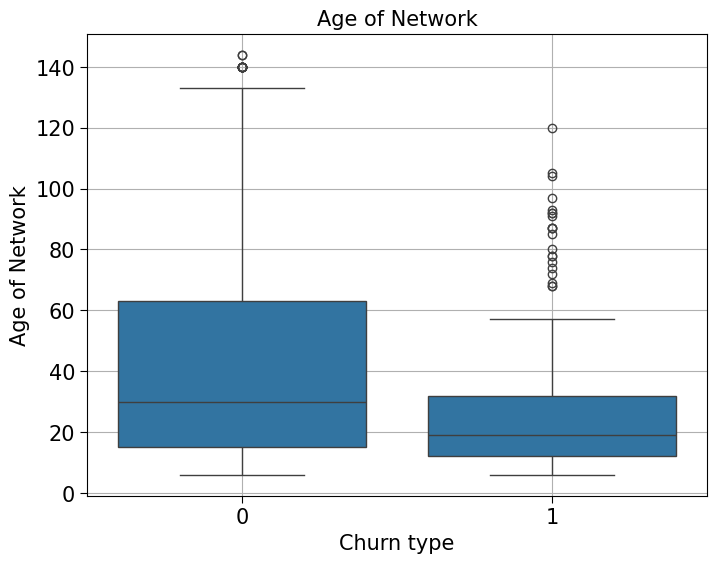

In [490]:
#Network
plt.figure(figsize=[8,6])
sns.boxplot(data=churn_data,x="churn",y="tenure")
plt.tick_params(size=5,labelsize = 15)
plt.title("Age of Network",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.ylabel("Age of Network",fontsize=15)
plt.grid(0.3)
plt.show()

In [491]:
churn_data.drop(['tenure_range'], axis=1, inplace=True)

In [499]:
churn_data['churn'].value_counts(normalize=True)

,proportion
churn,
0,0.983687
1,0.016313


### Model Development

In [492]:
df = churn_data.copy()
df.shape

(11647, 124)

In [493]:
X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)

In [627]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [497]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
X_train.shape,  X_test.shape

((8152, 123), (3495, 123))

In [504]:
## Handling Imbalance
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)
print(X_train_smote.shape, y_train_smote.shape)

(16026, 123) (16026,)


In [502]:
y_train_smote.value_counts(normalize=True)

,proportion
churn,
0,0.5
1,0.5


### LogisticeRegression Model

In [509]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score,classification_report,f1_score

In [507]:
logreg = LogisticRegression()

logreg.fit(X_train_smote, y_train_smote)

y_train_smote_pre = logreg.predict(X_train_smote)

In [510]:
### Checking on train data
print('Accuracy', accuracy_score(y_train_smote, y_train_smote_pre))
print('Precision', precision_score(y_train_smote, y_train_smote_pre))
print('Recall', recall_score(y_train_smote, y_train_smote_pre))
print('f1score', f1_score(y_train_smote, y_train_smote_pre))
print('\nConfusion Matrix\n', confusion_matrix(y_train_smote, y_train_smote_pre))
print('\nclassification report\n', classification_report(y_train_smote, y_train_smote_pre))

Accuracy 0.8438162985149132
Precision 0.8232809199718376
Recall 0.8755771870710096
f1score 0.8486241306319927

Confusion Matrix
 [[6507 1506]
 [ 997 7016]]

classification report
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      8013
           1       0.82      0.88      0.85      8013

    accuracy                           0.84     16026
   macro avg       0.85      0.84      0.84     16026
weighted avg       0.85      0.84      0.84     16026



In [511]:
y_test_smote_pre = logreg.predict(X_test)

In [512]:
### Checking on test data
print('Accuracy', accuracy_score(y_test, y_test_smote_pre))
print('Precision', precision_score(y_test, y_test_smote_pre))
print('Recall', recall_score(y_test, y_test_smote_pre))
print('f1score', f1_score(y_test, y_test_smote_pre))
print('\nConfusion Matrix\n', confusion_matrix(y_test, y_test_smote_pre))
print('\nclassification report\n', classification_report(y_test, y_test_smote_pre))

Accuracy 0.8068669527896996
Precision 0.04782608695652174
Recall 0.6470588235294118
f1score 0.08906882591093117

Confusion Matrix
 [[2787  657]
 [  18   33]]

classification report
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      3444
           1       0.05      0.65      0.09        51

    accuracy                           0.81      3495
   macro avg       0.52      0.73      0.49      3495
weighted avg       0.98      0.81      0.88      3495



In [629]:
cross_val_score(lr, X_train_smote, y_train_smote, n_jobs=-1)

array([0.84341859, 0.83837754, 0.84305772, 0.84305772, 0.8424337 ])

### Selecting features

In [514]:
from sklearn.feature_selection import RFE
# lets RFE select 15 most imp features for us
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select= 15)
rfe.fit(X_train_smote, y_train_smote)

In [622]:
rfe.ranking_

array([ 24,  20,  31,  88,  62,   8,  67,  21,  95,  34,  70,  54,  48,
        71, 108,  65,  40,  36,  23,  73,  81,  27,  90,   1,  22,  72,
        76,   5,   4,  93,  38, 107,  69,  96,   1,   1,   1,  29,  28,
        79,   7,   6,  97, 104,  45,  83, 106,   3,   2,   1,   1,  47,
        46,  91,  87,  58,  60,  41,   1,   1,  18,  17,  75,   9,  80,
         1,  64,  12,  82,  61, 109,   1,  84,  44,  26, 101,  15,  16,
        25,  51,  11,  53,  52,  89,  86,  55,  56,  14,  39,  30,  42,
        98,   1,  78,  92,  10,  43,  94,  77,  50,  49,  68, 102, 103,
        13,   1,  19,  74,  35,   1,  63,  66,  99,  33, 100,  57,  32,
       105,  37,   1,  85,  59,   1])

In [624]:
rfe_features = list(df.columns[rfe.support_])
rfe_features

['std_og_t2f_mou_8',
 'og_others_7',
 'og_others_8',
 'loc_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'total_rech_num_7',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'count_rech_2g_8',
 'sachet_2g_8',
 'sep_vbc_3g',
 'tenure',
 'loc_ic_mou_diff',
 'spl_ic_mou_diff']

In [520]:
X_rfe = pd.DataFrame(data=X_train_smote).iloc[:, rfe.support_]
y_rfe = y_train_smote

In [523]:
y_rfe.shape, X_rfe.shape

((16026,), (16026, 15))

In [625]:
X_rfe.columns

Index([23, 34, 35, 36, 49, 50, 58, 59, 65, 71, 92, 105, 109, 119, 122], dtype='int64')

In [628]:
cross_val_score(lr, X_rfe, y_rfe, n_jobs=-1)

array([0.77885215, 0.78408736, 0.78689548, 0.78876755, 0.77878315])

In [524]:
lrg = LogisticRegression(random_state=1)
lrg.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [529]:
y_rfe_pred = lrg.predict(X_rfe)

In [532]:
### Checking on train data
print('Accuracy', accuracy_score(y_rfe, y_rfe_pred))
print('Precision', precision_score(y_rfe, y_rfe_pred))
print('Recall', recall_score(y_rfe, y_rfe_pred))
print('f1score', f1_score(y_rfe, y_rfe_pred))
print('\nConfusion Matrix\n', confusion_matrix(y_rfe, y_rfe_pred))
print('\nclassification report\n', classification_report(y_rfe, y_rfe_pred))

Accuracy 0.7842880319480844
Precision 0.765625
Recall 0.8194184450268314
f1score 0.7916088974621738

Confusion Matrix
 [[6003 2010]
 [1447 6566]]

classification report
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      8013
           1       0.77      0.82      0.79      8013

    accuracy                           0.78     16026
   macro avg       0.79      0.78      0.78     16026
weighted avg       0.79      0.78      0.78     16026



In [527]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lrg.predict(X_test_rfe)

In [528]:
### Checking on test data
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('f1score', f1_score(y_test, y_pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
print('\nclassification report\n', classification_report(y_test, y_pred))

Accuracy 0.7542203147353362
Precision 0.03986332574031891
Recall 0.6862745098039216
f1score 0.07534983853606028

Confusion Matrix
 [[2601  843]
 [  16   35]]

classification report
               precision    recall  f1-score   support

           0       0.99      0.76      0.86      3444
           1       0.04      0.69      0.08        51

    accuracy                           0.75      3495
   macro avg       0.52      0.72      0.47      3495
weighted avg       0.98      0.75      0.85      3495



### Decision Tree

In [581]:
# lets create a decision tree now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [582]:
# apply SMOTE to tackle class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=45, k_neighbors=5)
X_tr_smote, y_tr_smote = sm.fit_resample(X_train,y_train)
print(X_tr_smote.shape)
print(y_tr_smote.shape)

(16026, 123)
(16026,)


In [583]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_leaf=5, max_depth= 4, random_state=42)


dtc.fit(X_tr_smote,y_tr_smote)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

[Text(0.5, 0.9, 'x[65] <= -0.563\ngini = 0.5\nsamples = 16026\nvalue = [8013, 8013]\nclass = No Churn'),
 Text(0.25, 0.7, 'x[110] <= -0.044\ngini = 0.423\nsamples = 8285\nvalue = [2518, 5767]\nclass = Churn'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[67] <= 0.041\ngini = 0.337\nsamples = 6583\nvalue = [1415, 5168]\nclass = Churn'),
 Text(0.0625, 0.3, 'x[50] <= -0.202\ngini = 0.231\nsamples = 5051\nvalue = [673, 4378]\nclass = Churn'),
 Text(0.03125, 0.1, 'gini = 0.203\nsamples = 4945\nvalue = [567, 4378]\nclass = Churn'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 106\nvalue = [106, 0]\nclass = No Churn'),
 Text(0.1875, 0.3, 'x[67] <= 0.122\ngini = 0.5\nsamples = 1532\nvalue = [742, 790]\nclass = Churn'),
 Text(0.15625, 0.1, 'gini = 0.313\nsamples = 428\nvalue = [345, 83]\nclass = No Churn'),
 Text(0.21875, 0.1, 'gini = 0.461\nsamples = 1104\nvalue = [397, 707]\nclass = Churn'),
 Text(0.375, 0.5, 'x[18] <= -0.492\ngini = 0.456\nsamples = 1702\nvalue = [1103, 599]\nclass = No C

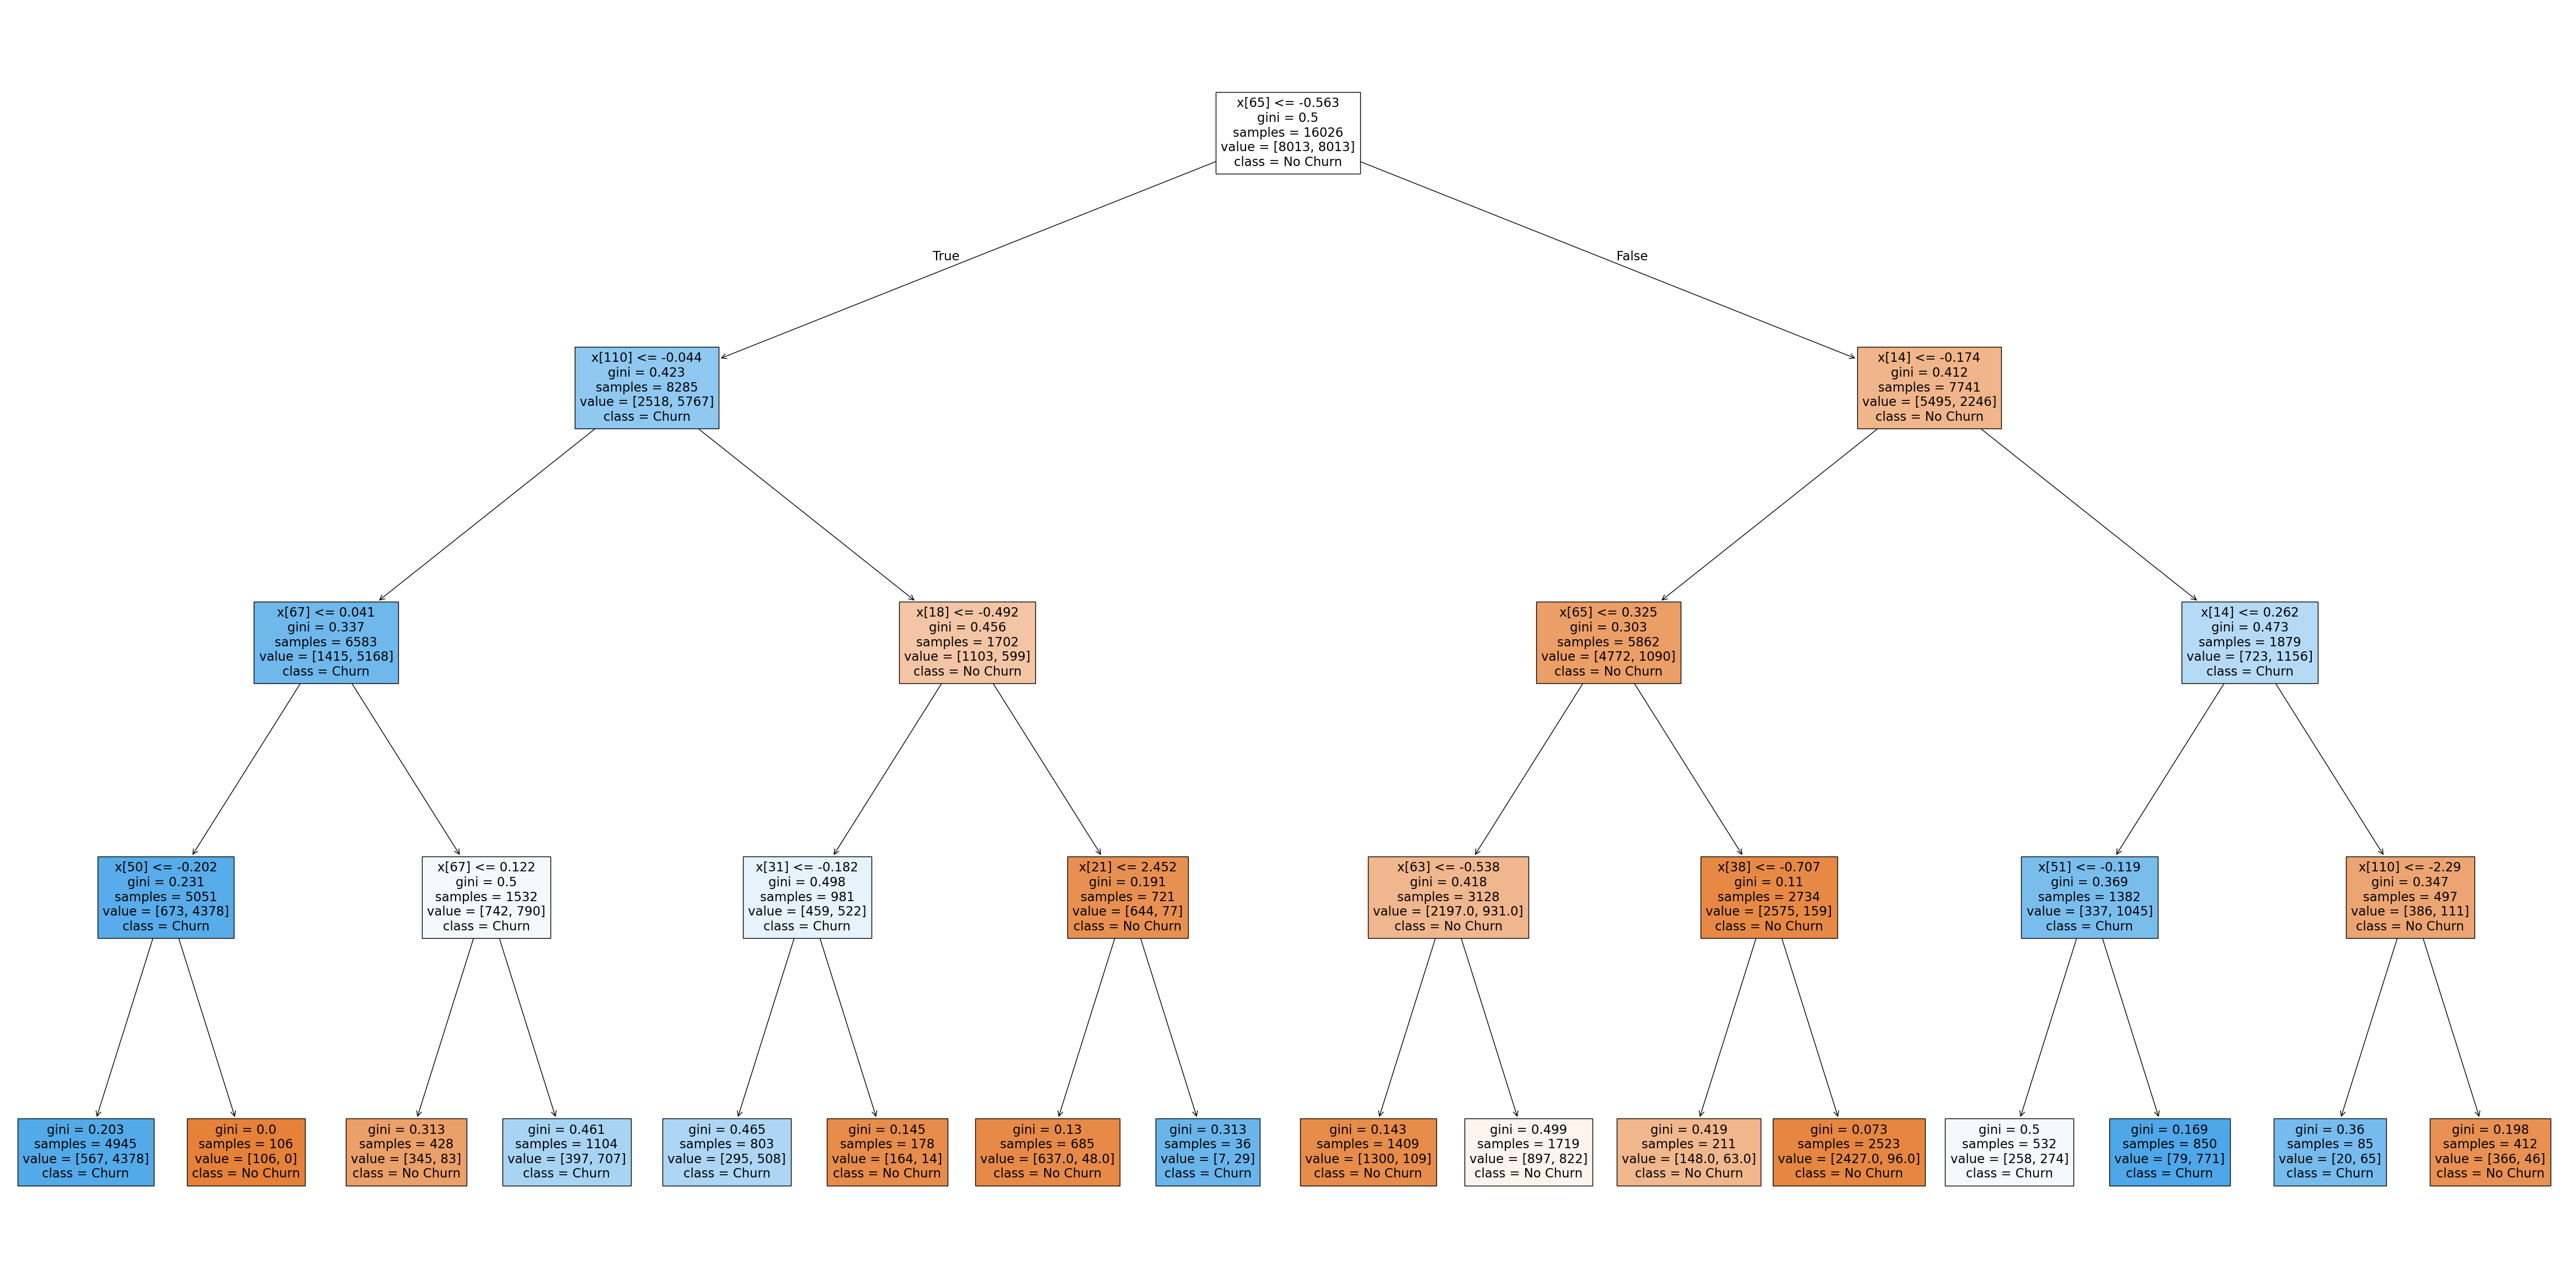

In [584]:
from sklearn.tree import plot_tree

plt.figure(figsize=(60,30))

plot_tree(dtc, class_names=['No Churn','Churn'], filled=True)

In [585]:
y_tr_smote_pred = dtc.predict(X_tr_smote)

In [586]:
### Checking on train data
print('Accuracy', accuracy_score(y_tr_smote, y_tr_smote_pred))
print('Precision', precision_score(y_tr_smote, y_tr_smote_pred))
print('Recall', recall_score(y_tr_smote, y_tr_smote_pred))
print('f1score', f1_score(y_tr_smote, y_tr_smote_pred))
print('\nConfusion Matrix\n', confusion_matrix(y_tr_smote, y_tr_smote_pred))
print('\nclassification report\n', classification_report(y_tr_smote, y_tr_smote_pred))

Accuracy 0.8187944590041183
Precision 0.8057450628366247
Recall 0.840134780980906
f1score 0.8225806451612904

Confusion Matrix
 [[6390 1623]
 [1281 6732]]

classification report
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      8013
           1       0.81      0.84      0.82      8013

    accuracy                           0.82     16026
   macro avg       0.82      0.82      0.82     16026
weighted avg       0.82      0.82      0.82     16026



In [587]:
y_test_pred = dtc.predict(X_test)

In [588]:
### Checking on test data
print('Accuracy', accuracy_score(y_test, y_test_pred))
print('Precision', precision_score(y_test, y_test_pred))
print('Recall', recall_score(y_test, y_test_pred))
print('f1score', f1_score(y_test, y_test_pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, y_test_pred))
print('\nclassification report\n', classification_report(y_test, y_test_pred))

Accuracy 0.7928469241773963
Precision 0.037138927097661624
Recall 0.5294117647058824
f1score 0.06940874035989718

Confusion Matrix
 [[2744  700]
 [  24   27]]

classification report
               precision    recall  f1-score   support

           0       0.99      0.80      0.88      3444
           1       0.04      0.53      0.07        51

    accuracy                           0.79      3495
   macro avg       0.51      0.66      0.48      3495
weighted avg       0.98      0.79      0.87      3495



### Randome forest

In [579]:
from sklearn.ensemble import RandomForestClassifier

In [590]:
rf = RandomForestClassifier(random_state= 42, max_depth=3, n_estimators=10)

rf.fit(X_tr_smote, y_train_smote)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [591]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)

In [603]:
sample_forest = rf.estimators_[0]

[Text(0.5, 0.875, 'x[30] <= -0.39\ngini = 0.5\nsamples = 10143\nvalue = [8013, 8013]\nclass = No Churn'),
 Text(0.25, 0.625, 'x[38] <= -0.668\ngini = 0.4\nsamples = 3380\nvalue = [3849, 1470]\nclass = No Churn'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[91] <= -0.656\ngini = 0.484\nsamples = 817\nvalue = [529, 761]\nclass = Churn'),
 Text(0.0625, 0.125, 'gini = 0.41\nsamples = 263\nvalue = [297, 120]\nclass = No Churn'),
 Text(0.1875, 0.125, 'gini = 0.39\nsamples = 554\nvalue = [232, 641]\nclass = Churn'),
 Text(0.375, 0.375, 'x[79] <= 1.32\ngini = 0.29\nsamples = 2563\nvalue = [3320, 709]\nclass = No Churn'),
 Text(0.3125, 0.125, 'gini = 0.223\nsamples = 2237\nvalue = [3087.0, 453.0]\nclass = No Churn'),
 Text(0.4375, 0.125, 'gini = 0.499\nsamples = 326\nvalue = [233, 256]\nclass = Churn'),
 Text(0.75, 0.625, 'x[111] <= 0.039\ngini = 0.475\nsamples = 6763\nvalue = [4164.0, 6543.0]\nclass = Churn'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[89] <= 1.269\ngini = 

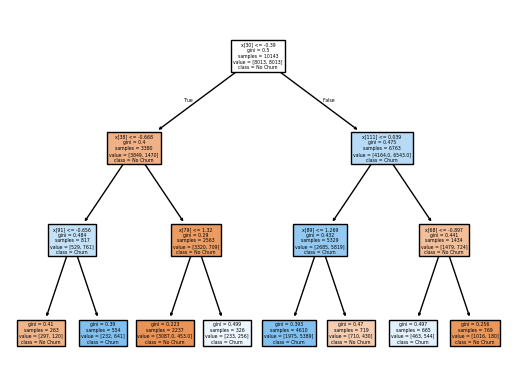

In [604]:
plot_tree(sample_forest, class_names=['No Churn','Churn'], filled=True)

### Variable importance in Randome forest

In [606]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

classifier_rf.fit(X_tr_smote, y_tr_smote)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [607]:
classifier_rf.feature_importances_

array([1.22155907e-03, 1.57859564e-03, 2.86051353e-02, 3.07413642e-03,
       1.36424570e-03, 4.32572024e-03, 2.09660927e-03, 1.34632844e-03,
       8.63461544e-03, 6.89761317e-04, 3.39432821e-03, 2.01535664e-02,
       1.09623349e-03, 9.26169712e-03, 4.79901123e-02, 2.16315324e-03,
       1.69027525e-03, 1.85628343e-03, 8.66932033e-04, 2.25020525e-03,
       1.70336342e-02, 2.26722620e-03, 3.73257889e-04, 4.07311297e-04,
       2.13413351e-03, 2.11906781e-03, 1.57718379e-03, 2.26436487e-03,
       6.69987344e-03, 1.76778020e-03, 2.27034741e-02, 6.67657021e-03,
       5.36191342e-03, 8.82225808e-03, 0.00000000e+00, 1.09626843e-04,
       1.10710662e-03, 1.79228522e-03, 9.64029221e-03, 1.35971052e-03,
       6.96045242e-04, 5.65829257e-04, 1.25765398e-03, 4.66660081e-04,
       8.68166166e-04, 2.30686080e-03, 1.16702684e-03, 2.72236822e-03,
       1.44485281e-03, 9.21337804e-04, 8.06017205e-03, 9.33761805e-03,
       2.16601469e-03, 7.61061537e-04, 1.20510913e-03, 1.11114590e-05,
      

In [619]:
pd_feature = pd.DataFrame({
    "varname": df.columns,
    "imp":classifier_rf.feature_importances_
})

In [620]:
pd_feature.sort_values(by='imp', ascending=False).head()

,varname,imp
65,last_day_rch_amt_8,0.115110
110,arpu_diff,0.057861
14,roam_og_mou_8,0.047990
67,max_rech_data_7,0.045315
105,sep_vbc_3g,0.032527


Last month reach amount is playing crucial indicator of Churn.
Roam outgoing, std outgoing & last recharge for 8th Month  are the most important columns to predict churn..
ARPU difference is playing crucial indicator for churn
cutomers with tenure less than 4 yrs are more likely to churn.
Max Recharge Amount is a strong feature to predict churn.
Random Forest produced the best prediction results followed by Decision tree